In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 18, 12

import warnings
warnings.filterwarnings('ignore')

### 1. Сгенерируйте данные с помощью кода:



In [2]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [3]:
print(len(x_data_generated))
x_data_generated

100


array([[-0.03455296, -0.91210888,  0.0319927 , ...,  0.24174014,
        -1.46749536,  0.44019374],
       [ 0.61990213,  0.60856261,  0.52435156, ...,  0.36140175,
         0.42188219,  0.94294432],
       [ 0.40646757,  0.55758729,  0.27073145, ..., -1.91553791,
         0.08777833, -1.91601302],
       ...,
       [ 0.239829  , -0.65085248, -2.37291886, ..., -0.90543543,
         0.99671514, -0.54676235],
       [ 0.49594264,  0.30579394, -0.34707236, ..., -0.86002592,
        -0.6033358 ,  1.16875601],
       [-0.6857221 , -0.56460332, -0.69111975, ...,  0.78327782,
         0.2412734 , -0.28531708]])

In [4]:
print(len(y_data_generated))
y_data_generated

100


array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

### 2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [6]:
CVS = cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()
CVS

0.9099999999999999


### 3. Используйте статистические методы для отбора признаков:
a) Выберите признаки на основе матрицы корреляции.

In [7]:
# Соеденим наши x и у
data = np.column_stack((x_data_generated, y_data_generated))
data.shape

(100, 21)

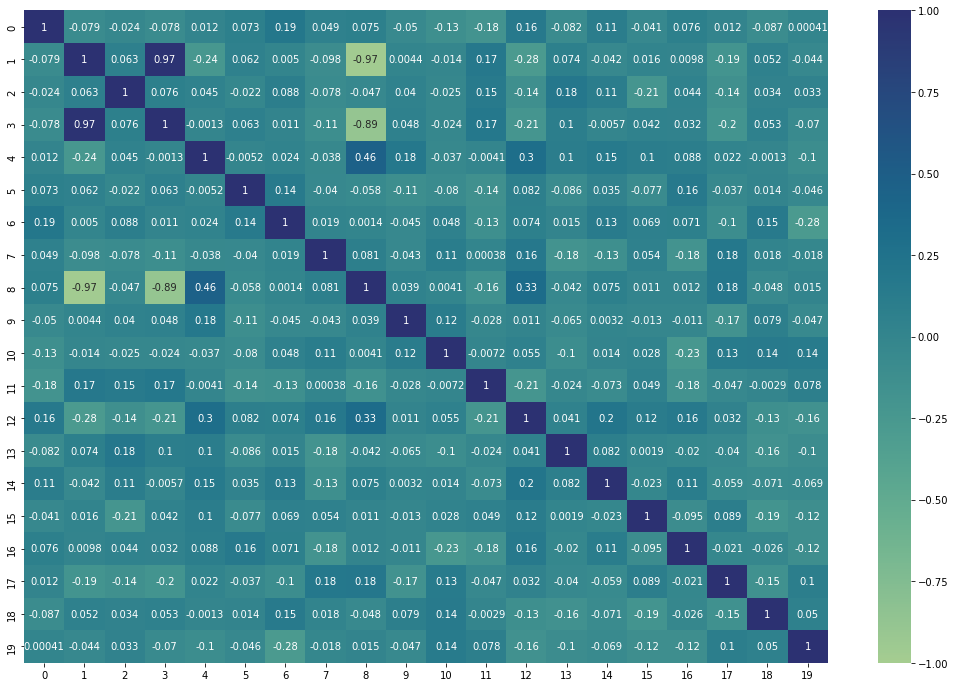

In [29]:
# Сделаем из нашего np.array ---> dataframe и посичтаем корреляцию
df = pd.DataFrame(data)
corr = df.loc[:, (df.columns != 20)].corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0, cmap="crest");

In [30]:
#Корреляция между 1-8, 3-8. Уберем 8.
X1 = df.loc[:, (df.columns != 8) & (df.columns != 20)]
y1 = df[20]

b) Отсеките низковариативные признаки (VarianceThreshold).

In [10]:
from sklearn.feature_selection import VarianceThreshold
X_VT = df.loc[:, df.columns!=20]
selector = VarianceThreshold(threshold=1)
X2 = selector.fit_transform(X_VT)

c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [31]:
a3_ = cross_val_score(LogisticRegression(), X1, y1, scoring='accuracy').mean()
b3_ = cross_val_score(LogisticRegression(), X2, y1, scoring='accuracy').mean()

In [32]:
print(f'Cредняя точность, после корреляционной очитски: {a3_}\nCредняя точность, после VarianceThreshold очитски: {b3_}')

Cредняя точность, после корреляционной очитски: 0.9099999999999999
Cредняя точность, после VarianceThreshold очитски: 0.9099999999999999



### 4. Осуществите отбор признаков на основе дисперсионного анализа:
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).


In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

x_sKB = df.loc[:, (df.columns != 20)]
y_sKB = df[20]

selector_k = SelectKBest(f_classif, k=5)
X3 = selector_k.fit_transform(x_sKB, y_sKB)

X3.shape

(100, 5)

b) Повторите п. 2 на отобранных признаках.



In [14]:
SKBest = cross_val_score(LogisticRegression(), X3, y1, scoring='accuracy').mean()
print(f'Cредняя точность, после дисперсионного анализа: {SKBest}')

Cредняя точность, после дисперсионного анализа: 0.9099999999999999


### 5. Отбор с использованием моделей:
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.


In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [16]:
X_temp = df.loc[:, (df.columns != 20)]

L_svc = LinearSVC(penalty="l1", C=0.1, dual=False).fit(X_temp, y1)
SFM = SelectFromModel(L_svc, prefit=True)
X4 = SFM.transform(X_temp)
X4.shape

(100, 8)

b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.


In [17]:
from sklearn.ensemble import RandomForestClassifier

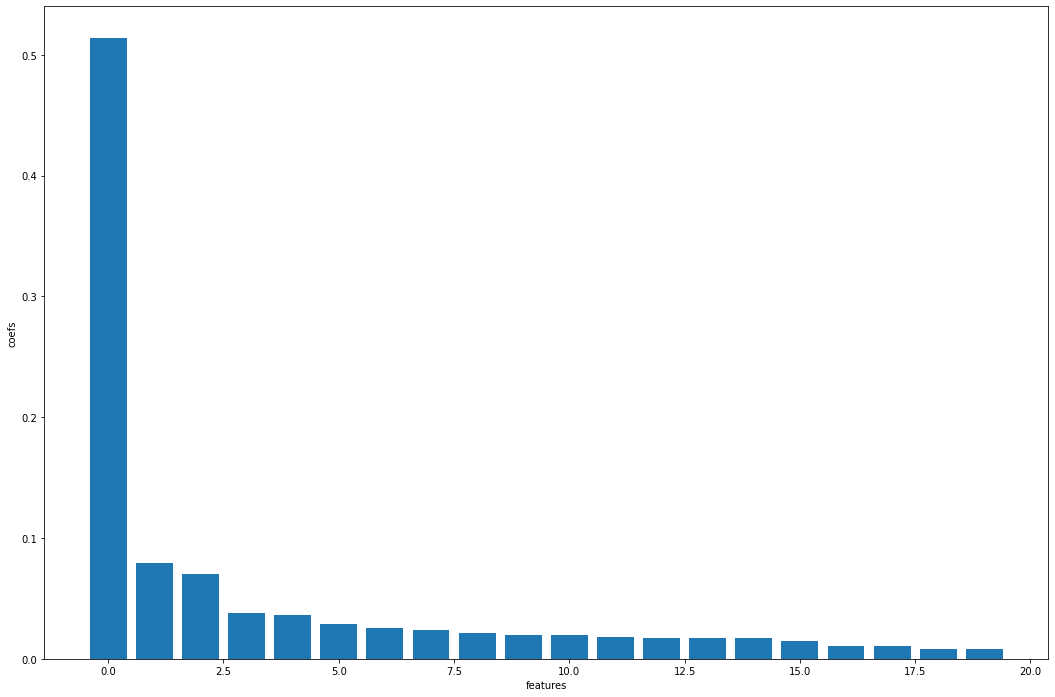

In [34]:
X_rf = df.loc[:, (df.columns != 20)]

rf = RandomForestClassifier(random_state=13, max_features=6).fit(X_rf, y1)
plt.bar(np.arange(len(rf.feature_importances_)), sorted(rf.feature_importances_, reverse=True))
plt.xlabel('features')
plt.ylabel('coefs');

In [35]:
from sklearn.feature_selection import RFE

selector_rfe = RFE(rf, n_features_to_select=6, step=1)
selector_rfe = selector_rfe.fit(X_rf, y1)

indexes = []
for i, el in enumerate(selector_rfe.support_):
    if el == True:
        indexes.append(i)
        
X5 = df[indexes]

c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.



In [36]:
SFM_LVC = cross_val_score(LogisticRegression(), X4, y1, scoring='accuracy').mean()
RF_RFE = cross_val_score(LogisticRegression(), X5, y1, scoring='accuracy').mean()

In [37]:
print(f'Cредняя точность, после L1 SVC - SelectFromModel: {SFM_LVC}')
print(f'Cредняя точность, после модели RandomForest: {RF_RFE}')

Cредняя точность, после L1 SVC - SelectFromModel: 0.9099999999999999
Cредняя точность, после модели RandomForest: 0.9


### 6.Перебор признаков:
a) SequentialFeatureSelector.


In [22]:
from sklearn.feature_selection import SequentialFeatureSelector

x_sfs = df.loc[:, (df.columns != 20)]

sfs_forward = SequentialFeatureSelector(
    RandomForestClassifier(random_state=13), n_features_to_select=10, direction="forward"
)

In [23]:
sfs_forward.fit(x_sfs, y1)


SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=13),
                          n_features_to_select=10)

In [24]:
X6 = sfs_forward.transform(x_sfs)

b) Повторите п. 2 на отобранных признаках.



In [38]:
sfs = cross_val_score(LogisticRegression(), X6, y1, scoring='accuracy').mean()
print(f'Cредняя точность, после SequentialFeatureSelector: {sfs}')

Cредняя точность, после SequentialFeatureSelector: 0.9199999999999999


### 7.Сформулируйте выводы по проделанной работе:
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

Это вседействительно интересно и увлекательно, но пока уловить общий смысл смог. Пока очень силно плаваю, когда и где что применяется. Очевидно забываю про стандартизацию, номрализацию и (третье) забыл, и на каких данных и кодга использовать.
так видно, что методы рабочие, какие-то лучше какие-то хуже или медленее (например как прямой SequentialFeatureSelector).

In [39]:
total = {'Способ выбора признаков': \
         ['Без метода', 'Корреляция', 'VarianceThreshold', 'Скоринговая функция', \
          'L1 регуляризация', 'RandomForest', 'SequentialFeatureSelector'],\
        'Kоличество признаков': [x_data_generated.shape[1], X1.shape[1], X2.shape[1], \
                                 X3.shape[1], X4.shape[1], X5.shape[1], X6.shape[1]],\
        'Средняя точность модели': [CVS, a3_, b3_, SKBest, SFM_LVC, RF_RFE, sfs]}

In [40]:
resume = pd.DataFrame(total)
resume.sort_values(by='Средняя точность модели', ascending=False)

,Способ выбора признаков,Kоличество признаков,Средняя точность модели
6,SequentialFeatureSelector,10,0.92
0,Без метода,20,0.91
1,Корреляция,19,0.91
2,VarianceThreshold,11,0.91
3,Скоринговая функция,5,0.91
4,L1 регуляризация,8,0.91
5,RandomForest,6,0.90
